### Project Part 3

#### Alex Barrios (u96011930)

#### Stephani Crous (u17014663)

#### Phathutshedzo Maungo (u14026962)

### 1) Parameter Estimation: Nonlinear Model

#### Imports

In [1]:
import numpy
import tclab
from matplotlib import pyplot as plt
from tclab import TCLab, clock, Historian, Plotter, setup
%matplotlib inline

#### Parameters of Fin bank 1 (F1)

In [2]:
AF1 = 0.0004                    # m2  
AFIN1 = 0.00009                 # m2
VF1 = 0.00036                   # m3
mF1 = 0.0029*0.65               # kg             CHANGE
CpF1 = 502.42*0.65              # J.kg-1.C-1     CHANGE
rhoF1 = 7900                    # kg.m-3
hF1 = 10.45*0.85                # W.m-2.K-1      CHANGE

#### Parameters of Fin bank 2 (F2)

In [3]:
AF2 = 0.0004                    # m2
VF2 = 0.00036                   # m3
CpF2 = 502.42*0.65              # J.kg-1.C-1      CHANGE
mF2 = 0.0029*0.65               # kg              CHANGE
rhoF2 = 7900                    # kg.m-3 
hF2 = 10.45*0.85                # W.m-2.K-1       CHANGE

#### Parameters of Heater 1 (H1)

In [4]:
kH1 = 14.4/1000                 # W.m-1.K-1
AH1 = 0.00008                   # m2  
LH1 = 0.0015                    # m
mH1 = 0.00019*0.65              # kg              CHANGE
CpH1 = 502.42*0.65              # J.kg-1.C-1      CHANGE
hH1 = 10.45*0.85                # W.m-2.K-1       CHANGE

#### Parameters of Heater 2 (H2)

In [5]:
kH2 = 14.4/1000                 # W.m-1.K-1
AH2 = 0.00008                   # m2
LH2 = 0.0015                    # m
mH2 = 0.00019*0.65              # kg              CHANGE  
CpH2 = 502.42*0.65              # J.kg-1.C-1      CHANGE
hH2 = 10.45*0.85                # W.m-2.K-1       CHANGE

#### Parameters of Sensor 1 (S1)

In [6]:
AS1 = 0.000016                  # m2
mS1 = 0.00025*0.65              # kg              CHANGE 
CpS1 = 502.42*0.65              # J.kg-1.C-1      CHANGE
hS1 = 10.45*0.85                # W.m-2.K-1       CHANGE

#### Parameters of Sensor 2 (S2)

In [7]:
AS2 = 0.000016                  # m2
mS2 = 0.00025*0.65              # kg              CHANGE 
CpS2 = 502.42*0.65              # J.kg-1.C-1      CHANGE
hS2 = 10.45*0.85                # W.m-2.K-1       CHANGE

#### Other Parameters

In [8]:
alpha1 = 0.01                    # W
alpha2 = 0.0075                  # W                                    
h_amb = 10.45*0.85               # W.m-2.K-1      CHANGE
T_amb = 298.15                   # K              CHANGE
E = 0.85                         # Emissivity
sigma = 5.67*(10**-8)            # Stefan-Boltzmann constant
rho_ss = 7900                    # Density of stainless steel (kgm-3)

#### Inputs to step and rectangular disturbances

In [9]:
M0 = 0
M1 = 100
M2 = 0
ts1 = 30
ts2 = 900

#### Step and rectangular disturbances

In [10]:
def Q_rect(t, M0, M1, M2, ts1, ts2):
    if t < ts1:
        return M0
    
    elif ts1 < t < ts2:
        return M1
    
    else:
        return M2
    
def Q_step(t, M0, M1, ts1):
    if t < ts1:
        return M0
    
    else:
        return M1

#### Model

#### Step input

In [11]:
# Differential Equations

def diff(t, T):
    TF1, TF2, TH1, TH2, TS1, TS2 = T
    QIN1 = Q_step(t, M0, M1, ts1)
    QIN2 = Q_step(t, M0, 0, ts1)
        
    # Fin Equations

    Qconv_1 = h_amb*AF1*(TF1 - T_amb)
    Qconv_2 = h_amb*AF2*(TF2 - T_amb)

    Qcond_1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TF1)             # CHANGE
    Qcond_2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TF2)             # CHANGE

    Qrad_1 = E*sigma*AF1*((TF1**4) - (T_amb**4))
    Qrad_2 = E*sigma*AF2*((TF2**4) - (T_amb**4))

    Qconv_12 = h_amb*(AFIN1)*(TF1 - TF2)
    Qrad_12 = E*sigma*(AFIN1)*((TF1**4) - (TF2**4))
    
    # Heater Equations

    QH1_F1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TF1)              # CHANGE
    QH2_F2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TF2)              # CHANGE

    QH1_S1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TS1)              # CHANGE
    QH2_S2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TS2)              # CHANGE

    QH1_conv = hH1*AH1*(TH1 - T_amb)
    QH2_conv = hH2*AH2*(TH2 - T_amb)

    QH1_rad = E*sigma*AH1*((TH1**4) - (T_amb**4))
    QH2_rad = E*sigma*AH2*((TH2**4) - (T_amb**4))
    
    # Sensor Equations

    QS1_cond = QH1_S1
    QS2_cond = QH2_S2

    QS1_conv = hS1*AS1*(TS1 - T_amb)                  
    QS2_conv = hS2*AS2*(TS2 - T_amb)                  

    QS1_rad = E*sigma*AS1*((TS1**4) - (T_amb**4))
    QS2_rad = E*sigma*AS2*((TS2**4) - (T_amb**4))
    
    # Differential Equations
    
    dTF1dt = (1/(mF1*CpF1))*(-Qconv_1 - Qrad_1 + Qcond_1 - Qconv_12 - Qrad_12)
    dTF2dt = (1/(mF2*CpF2))*(-Qconv_2 - Qrad_2 + Qcond_2 + Qconv_12 + Qrad_12)

    dTH1dt = (1/(mH1*CpH1))*(-QH1_F1 - QH1_S1 - QH1_conv - QH1_rad + alpha1*QIN1)
    dTH2dt = (1/(mH2*CpH2))*(-QH2_F2 - QH2_S2 - QH2_conv - QH2_rad + alpha2*QIN2)

    dTS1dt = (1/(mS1*CpS1))*(QS1_cond - QS1_rad - QS1_conv)
    dTS2dt = (1/(mS2*CpS2))*(QS2_cond - QS2_rad - QS2_conv)

    return dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt

In [12]:
TCLab = setup(connected = True, speedup = 1)
tfinal = 600
t_step = 1

In [13]:
tspan = []

In [14]:
def T1_model():
    return Tss1

def T2_model():
    return Tss2

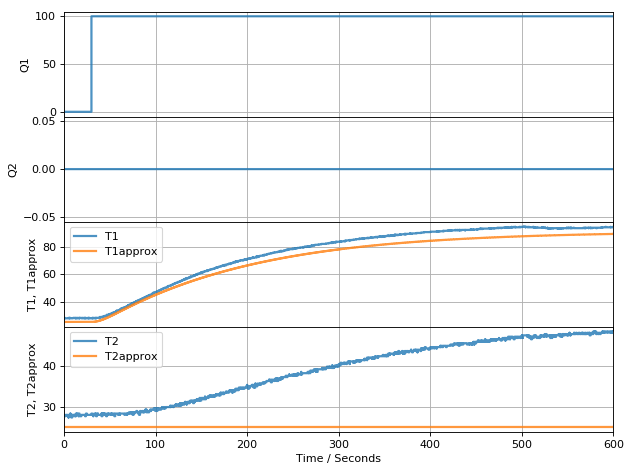

TCLab disconnected successfully.


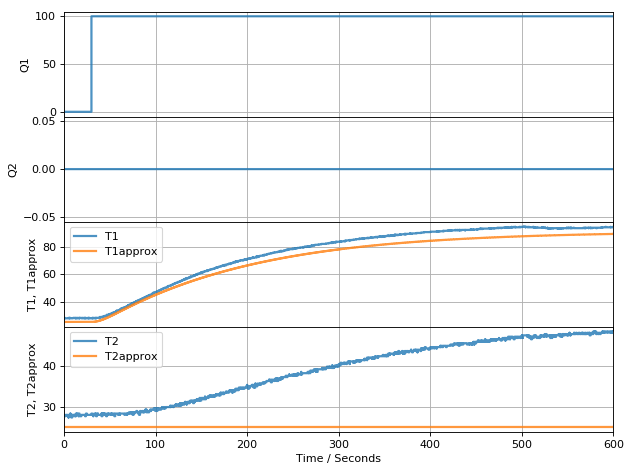

In [15]:
with TCLab() as lab:
    
    hist = Historian(lab.sources + [('T1approx', T1_model)] + [('T2approx', T2_model)])
    p = Plotter(hist, tfinal, layout=(('Q1',), ('Q2',), ('T1', 'T1approx'), ('T2', 'T2approx')))
    #hist = Historian(lab.sources)
    #p = Plotter(hist, tfinal)
    dt = t_step
    To = [298.15, 298.15, 298.15, 298.15, 298.15, 298.15]
    TF1, TF2, TH1, TH2, TS1, TS2 = To
    TS1s = []
    TS2s = []
    Tlab1 = []
    Tlab2 = []

    for t in tclab.clock(tfinal, t_step):
        
        lab.Q1(Q_step(t, M0, M1, ts1))
        lab.Q2(Q_step(t, M0, 0, ts1))           

        To = TF1, TF2, TH1, TH2, TS1, TS2 
        dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt = diff(t, To)

        TF1 += dTF1dt*dt
        TF2 += dTF2dt*dt
        TH1 += dTH1dt*dt
        TH2 += dTH2dt*dt
        TS1 += dTS1dt*dt
        TS2 += dTS2dt*dt

        To = TF1, TF2, TH1, TH2, TS1, TS2
        Tss1 = TS1-273.15
        Tss2 = TS2-273.15
        TS1s.append(TS1-273.15)
        TS2s.append(TS2-273.15)
        Tlab1.append(lab.T1)
        Tlab2.append(lab.T2)
        tspan.append(t)
        hist.update(t)
        p.update(t)
    plt.savefig('Temp_real1.svg')

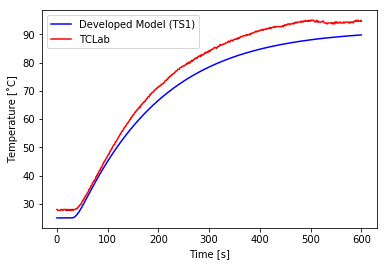

In [16]:
plt.plot(tspan, TS1s, "b-", label = 'Developed Model (TS1)')
plt.plot(tspan, Tlab1, "r-", label = 'TCLab')
plt.xlabel("Time [s]")
plt.ylabel("Temperature [˚C]")
plt.legend(loc='best')
plt.savefig('TS1_tempcurve_real_step1.svg')
plt.show()

#### Step size 0-100

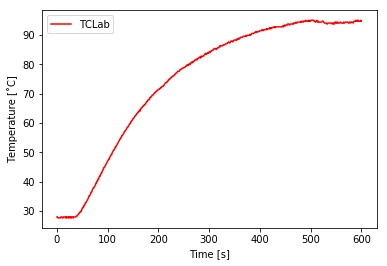

0.6670999999999999


In [17]:
plt.plot(tspan, Tlab1, "r-", label = 'TCLab')
plt.xlabel("Time [s]")
plt.ylabel("Temperature [˚C]")
plt.legend(loc='best')
plt.savefig('k3.svg')
plt.show()
print((Tlab1[-1] - Tlab1[0])/100)

### 2) Parameter Estimation: Linear Model

#### Imports

In [1]:
import scipy.signal
import numpy as np
import tclab
from scipy.linalg import block_diag
from tclab import TCLab, clock, Historian, Plotter, setup

In [2]:
import sympy
sympy.init_printing()

####  Effect of Q1 on T1

In [3]:
num1 = 0.69627052016                                        # K
den1 = [199.586477912, 1]                                   # (tau*s + 1)

G11 = scipy.signal.lti(num1, den1)

####  Effect of Q2 on T2

In [41]:
num2 = 0.152409786038                                      # K
den2 = [217.282766993, 1]                                  # (tau*s + 1)

G22 = scipy.signal.lti(num2, den2)

#### Effect of Q1 on T2

In [42]:
num3 = 0.158103632558                                       # K
den3 = np.convolve([145.106952068, 1], [147.075555312, 1])  # (tau1*s + 1)*(tau2*s + 1)

G21 = scipy.signal.lti(num3, den3)

#### Effect of Q2 on T1

In [43]:
num4 = 0.100790375                                          # K
den4 = np.convolve([184.668159, 1], [142.999742, 1])        # (tau1*s + 1)*(tau2*s + 1)

G12 = scipy.signal.lti(num4, den4)

####  Transfer function to state space 

In [44]:
G11ss = G11.to_ss()
G12ss = G12.to_ss()
G21ss = G21.to_ss()
G22ss = G22.to_ss()

A11 = G11ss.A
B11 = G11ss.B
C11 = G11ss.C
D11 = G11ss.D

A12 = G12ss.A
B12 = G12ss.B
C12 = G12ss.C
D12 = G12ss.D

A21 = G21ss.A
B21 = G21ss.B
C21 = G21ss.C
D21 = G21ss.D

A22 = G22ss.A
B22 = G22ss.B
C22 = G22ss.C
D22 = G22ss.D

#### State space form

In [45]:
A = block_diag(A11, A12, A21, A22)

B1h = block_diag(B11, B12)
B2h = block_diag(B21, B22)
B = np.vstack((B1h, B2h))

C1h = np.hstack((C11, C12))
C2h = np.hstack((C21, C22))
C = block_diag(C1h, C2h)

D1h = np.hstack((D11, D12))
D2h = np.hstack((D21, D22))
D = np.vstack((D1h, D2h))


In [46]:
M0 = 0
M1 = 100
M2 = 0
ts1 = 30
ts2 = 900

#### Step input

In [47]:
def Q_step(t, M0, M1, ts1):
    if t < ts1:
        return M0
    
    else:
        return M1

In [48]:
def Temp(t, T1o, T2o):
    
    tspan = np.linspace(0, t, 1000)
    dt = tspan[1]-tspan[0]
    
    x = np.zeros((A.shape[0],1))
    
    for i in np.arange(0, len(tspan), 1):
    
        Q1 = Q_step(t, M0, M1, ts1)
        Q2 =  0

        Q = np.array([[Q1], [Q2]])

        dxdt = A.dot(x) + B.dot(Q)
        y = C.dot(x) + D.dot(Q)
        
        x = x + dxdt*dt

        T1 = y[0,0] + T1o
        T2 = y[1,0] + T2o
    
    return [T1, T2]

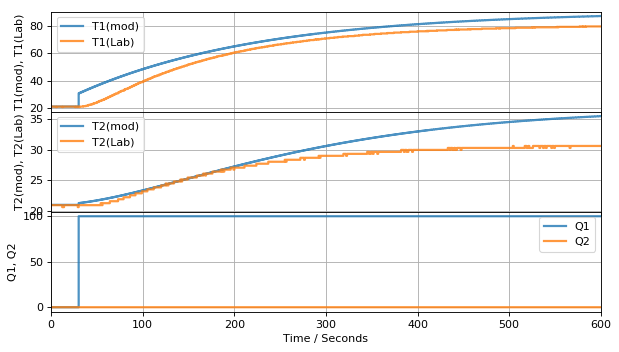

TCLab Model disconnected successfully.


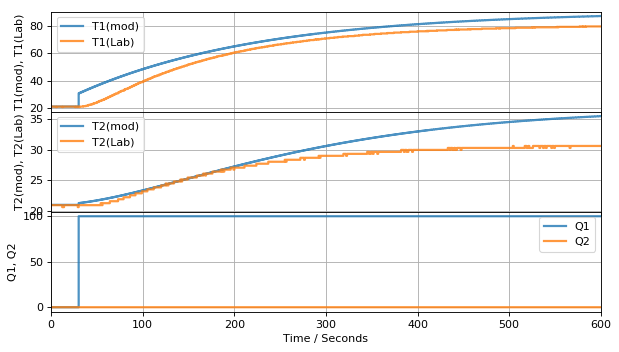

In [49]:
TCLab = tclab.setup(connected = False)
t_run = 600

with TCLab() as lab:

    T1o = 21
    T2o = 21
    
    sources = [('T1(mod)', lambda: Temp(t,T1o, T2o)[0]), ('T2(mod)', lambda: Temp(t,T1o,T2o)[1]),
               ('T1(Lab)', lambda: lab.T1), ('T2(Lab)', lambda: lab.T2),
              ('Q1', lambda: lab.Q1()), ('Q2', lambda: lab.Q2())]

    h = tclab.Historian(sources)
    
    p = Plotter(h, twindow=t_run, layout = (('T1(mod)', 'T1(Lab)'),
                                          ('T2(mod)', 'T2(Lab)'),
                                          ('Q1', 'Q2')))
    
    for t in clock(t_run): 
        Q1 = Q_step(t, M0, M1, ts1)
        Q2 = 0
        lab.Q1(Q1)
        lab.Q2(Q2)
        
        p.update(t)

### 3) Step Size

#### A larger dt than dt = 1

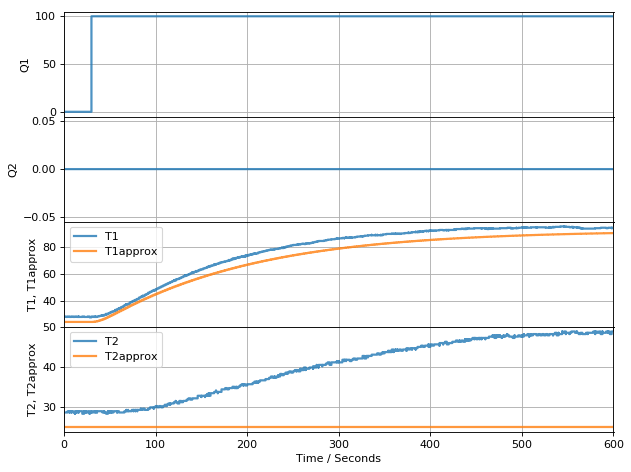

TCLab disconnected successfully.


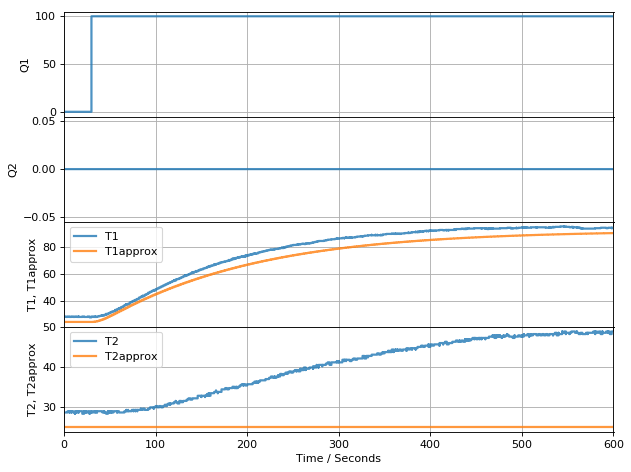

In [18]:
with TCLab() as lab:
    
    hist = Historian(lab.sources + [('T1approx', T1_model)] + [('T2approx', T2_model)])
    p = Plotter(hist, tfinal, layout=(('Q1',), ('Q2',), ('T1', 'T1approx'), ('T2', 'T2approx')))
    
    t_step2 = 2
    dt = t_step2
    To = [298.15, 298.15, 298.15, 298.15, 298.15, 298.15]
    TF1, TF2, TH1, TH2, TS1, TS2 = To
    TS1s = []
    TS2s = []
    Tlab1 = []
    Tlab2 = []

    for t in tclab.clock(tfinal, t_step2):
        
        lab.Q1(Q_step(t, M0, M1, ts1))
        lab.Q2(Q_step(t, M0, 0, ts1))           

        To = TF1, TF2, TH1, TH2, TS1, TS2 
        dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt = diff(t, To)

        TF1 += dTF1dt*dt
        TF2 += dTF2dt*dt
        TH1 += dTH1dt*dt
        TH2 += dTH2dt*dt
        TS1 += dTS1dt*dt
        TS2 += dTS2dt*dt

        To = TF1, TF2, TH1, TH2, TS1, TS2
        Tss1 = TS1-273.15
        Tss2 = TS2-273.15
        TS1s.append(TS1-273.15)
        TS2s.append(TS2-273.15)
        Tlab1.append(lab.T1)
        Tlab2.append(lab.T2)
        tspan.append(t)
        hist.update(t)
        p.update(t)
    plt.savefig('Temp_real2.svg')

#### A smaller dt than dt = 1

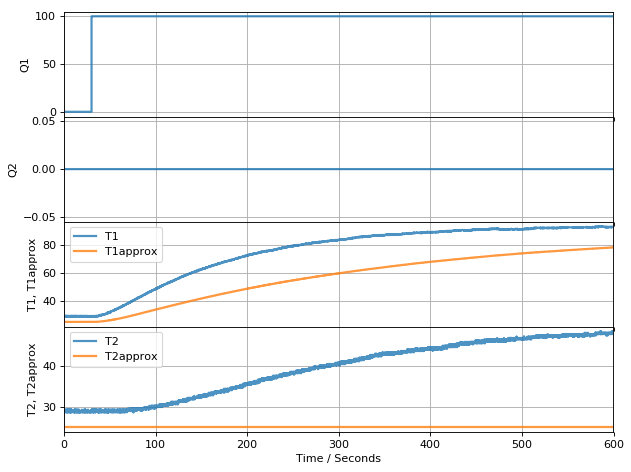

TCLab disconnected successfully.


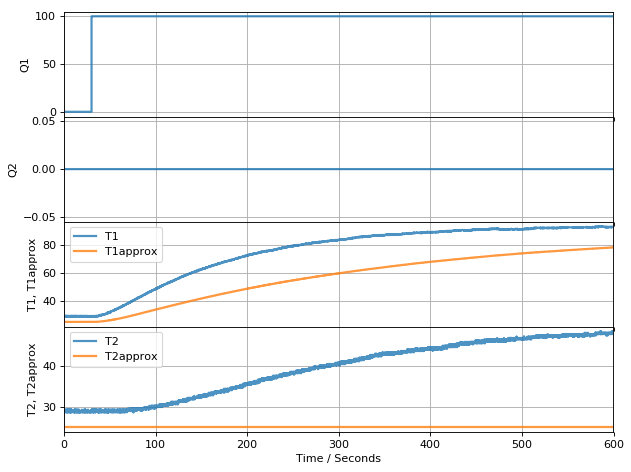

In [20]:
with TCLab() as lab:
    
    hist = Historian(lab.sources + [('T1approx', T1_model)] + [('T2approx', T2_model)])
    p = Plotter(hist, tfinal, layout=(('Q1',), ('Q2',), ('T1', 'T1approx'), ('T2', 'T2approx')))
    #hist = Historian(lab.sources)
    #p = Plotter(hist, tfinal)
    t_step3 = 0.1
    dt = t_step3
    To = [298.15, 298.15, 298.15, 298.15, 298.15, 298.15]
    TF1, TF2, TH1, TH2, TS1, TS2 = To
    TS1s = []
    TS2s = []
    Tlab1 = []
    Tlab2 = []

    for t in tclab.clock(tfinal, t_step3):
        
        lab.Q1(Q_step(t, M0, M1, ts1))
        lab.Q2(Q_step(t, M0, 0, ts1))           

        To = TF1, TF2, TH1, TH2, TS1, TS2 
        dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt = diff(t, To)

        TF1 += dTF1dt*dt
        TF2 += dTF2dt*dt
        TH1 += dTH1dt*dt
        TH2 += dTH2dt*dt
        TS1 += dTS1dt*dt
        TS2 += dTS2dt*dt

        To = TF1, TF2, TH1, TH2, TS1, TS2
        Tss1 = TS1-273.15
        Tss2 = TS2-273.15
        TS1s.append(TS1-273.15)
        TS2s.append(TS2-273.15)
        Tlab1.append(lab.T1)
        Tlab2.append(lab.T2)
        tspan.append(t)
        hist.update(t)
        p.update(t)
    plt.savefig('Temp_real3.svg')

### 4) Linearity

#### Step size of 0-10

In [21]:
M0 = 0
M1 = 10
M2 = 0
ts1 = 30
ts2 = 900

In [22]:
def Q_rect(t, M0, M1, M2, ts1, ts2):
    if t < ts1:
        return M0
    
    elif ts1 < t < ts2:
        return M1
    
    else:
        return M2
    
def Q_step(t, M0, M1, ts1):
    if t < ts1:
        return M0
    
    else:
        return M1

In [23]:
# Differential Equations

def diff(t, T):
    TF1, TF2, TH1, TH2, TS1, TS2 = T
    QIN1 = Q_step(t, M0, M1, ts1)
    QIN2 = Q_step(t, M0, 0, ts1)
        
    # Fin Equations

    Qconv_1 = h_amb*AF1*(TF1 - T_amb)
    Qconv_2 = h_amb*AF2*(TF2 - T_amb)

    Qcond_1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TF1)             # CHANGE
    Qcond_2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TF2)             # CHANGE

    Qrad_1 = E*sigma*AF1*((TF1**4) - (T_amb**4))
    Qrad_2 = E*sigma*AF2*((TF2**4) - (T_amb**4))

    Qconv_12 = h_amb*(AFIN1)*(TF1 - TF2)
    Qrad_12 = E*sigma*(AFIN1)*((TF1**4) - (TF2**4))
    
    # Heater Equations

    QH1_F1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TF1)              # CHANGE
    QH2_F2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TF2)              # CHANGE

    QH1_S1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TS1)              # CHANGE
    QH2_S2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TS2)              # CHANGE

    QH1_conv = hH1*AH1*(TH1 - T_amb)
    QH2_conv = hH2*AH2*(TH2 - T_amb)

    QH1_rad = E*sigma*AH1*((TH1**4) - (T_amb**4))
    QH2_rad = E*sigma*AH2*((TH2**4) - (T_amb**4))
    
    # Sensor Equations

    QS1_cond = QH1_S1
    QS2_cond = QH2_S2

    QS1_conv = hS1*AS1*(TS1 - T_amb)                  
    QS2_conv = hS2*AS2*(TS2 - T_amb)                  

    QS1_rad = E*sigma*AS1*((TS1**4) - (T_amb**4))
    QS2_rad = E*sigma*AS2*((TS2**4) - (T_amb**4))
    
    # Differential Equations
    
    dTF1dt = (1/(mF1*CpF1))*(-Qconv_1 - Qrad_1 + Qcond_1 - Qconv_12 - Qrad_12)
    dTF2dt = (1/(mF2*CpF2))*(-Qconv_2 - Qrad_2 + Qcond_2 + Qconv_12 + Qrad_12)

    dTH1dt = (1/(mH1*CpH1))*(-QH1_F1 - QH1_S1 - QH1_conv - QH1_rad + alpha1*QIN1)
    dTH2dt = (1/(mH2*CpH2))*(-QH2_F2 - QH2_S2 - QH2_conv - QH2_rad + alpha2*QIN2)

    dTS1dt = (1/(mS1*CpS1))*(QS1_cond - QS1_rad - QS1_conv)
    dTS2dt = (1/(mS2*CpS2))*(QS2_cond - QS2_rad - QS2_conv)

    return dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt

In [24]:
TCLab = setup(connected = True, speedup = 1)
tfinal = 600
t_step = 1
tspan = []

In [25]:
def T1_model():
    return Tss1

def T2_model():
    return Tss2

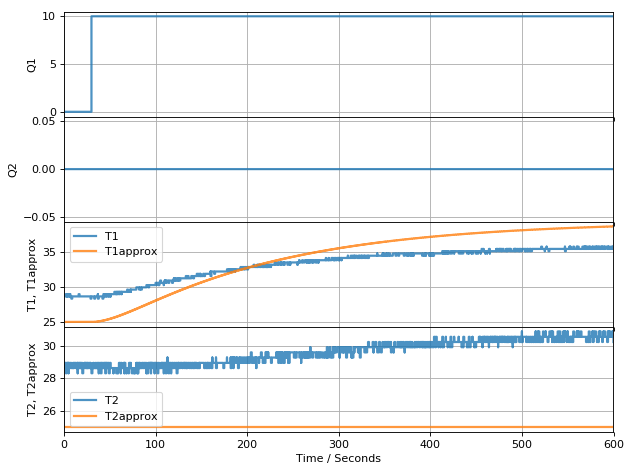

TCLab disconnected successfully.


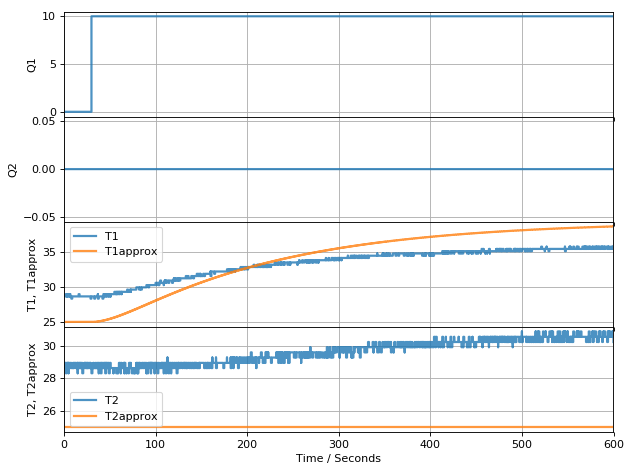

In [26]:
with TCLab() as lab:
    
    hist = Historian(lab.sources + [('T1approx', T1_model)] + [('T2approx', T2_model)])
    p = Plotter(hist, tfinal, layout=(('Q1',), ('Q2',), ('T1', 'T1approx'), ('T2', 'T2approx')))
    #hist = Historian(lab.sources)
    #p = Plotter(hist, tfinal)
    dt = t_step
    To = [298.15, 298.15, 298.15, 298.15, 298.15, 298.15]
    TF1, TF2, TH1, TH2, TS1, TS2 = To
    TS1s = []
    TS2s = []
    Tlab1 = []
    Tlab2 = []

    for t in tclab.clock(tfinal, t_step):
        
        lab.Q1(Q_step(t, M0, M1, ts1))
        lab.Q2(Q_step(t, M0, 0, ts1))           

        To = TF1, TF2, TH1, TH2, TS1, TS2 
        dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt = diff(t, To)

        TF1 += dTF1dt*dt
        TF2 += dTF2dt*dt
        TH1 += dTH1dt*dt
        TH2 += dTH2dt*dt
        TS1 += dTS1dt*dt
        TS2 += dTS2dt*dt

        To = TF1, TF2, TH1, TH2, TS1, TS2
        Tss1 = TS1-273.15
        Tss2 = TS2-273.15
        TS1s.append(TS1-273.15)
        TS2s.append(TS2-273.15)
        Tlab1.append(lab.T1)
        Tlab2.append(lab.T2)
        tspan.append(t)
        hist.update(t)
        p.update(t)
    plt.savefig('Temp_real4.svg')

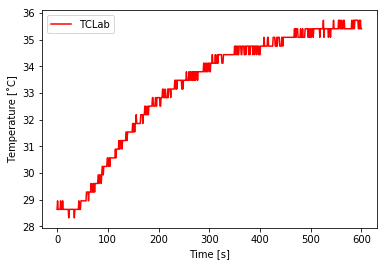

0.6769999999999996


In [27]:
# plt.plot(tspan, TS1s, "b-", label = 'Developed Model (TS1)')
plt.plot(tspan, Tlab1, "r-", label = 'TCLab')
plt.xlabel("Time [s]")
plt.ylabel("Temperature [˚C]")
plt.legend(loc='best')
plt.savefig('k2.svg')
plt.show()
print((Tlab1[-1] - Tlab1[0])/10)

#### Step size of 0-50

In [28]:
M0 = 0
M1 = 50
M2 = 0
ts1 = 30
ts2 = 900

In [29]:
def Q_rect(t, M0, M1, M2, ts1, ts2):
    if t < ts1:
        return M0
    
    elif ts1 < t < ts2:
        return M1
    
    else:
        return M2
    
def Q_step(t, M0, M1, ts1):
    if t < ts1:
        return M0
    
    else:
        return M1

In [30]:
# Differential Equations

def diff(t, T):
    TF1, TF2, TH1, TH2, TS1, TS2 = T
    QIN1 = Q_step(t, M0, M1, ts1)
    QIN2 = Q_step(t, M0, 0, ts1)
        
    # Fin Equations

    Qconv_1 = h_amb*AF1*(TF1 - T_amb)
    Qconv_2 = h_amb*AF2*(TF2 - T_amb)

    Qcond_1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TF1)             # CHANGE
    Qcond_2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TF2)             # CHANGE

    Qrad_1 = E*sigma*AF1*((TF1**4) - (T_amb**4))
    Qrad_2 = E*sigma*AF2*((TF2**4) - (T_amb**4))

    Qconv_12 = h_amb*(AFIN1)*(TF1 - TF2)
    Qrad_12 = E*sigma*(AFIN1)*((TF1**4) - (TF2**4))
    
    # Heater Equations

    QH1_F1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TF1)              # CHANGE
    QH2_F2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TF2)              # CHANGE

    QH1_S1 = ((kH1*AH1*0.075)/LH1)*(TH1 - TS1)              # CHANGE
    QH2_S2 = ((kH2*AH2*0.075)/LH2)*(TH2 - TS2)              # CHANGE

    QH1_conv = hH1*AH1*(TH1 - T_amb)
    QH2_conv = hH2*AH2*(TH2 - T_amb)

    QH1_rad = E*sigma*AH1*((TH1**4) - (T_amb**4))
    QH2_rad = E*sigma*AH2*((TH2**4) - (T_amb**4))
    
    # Sensor Equations

    QS1_cond = QH1_S1
    QS2_cond = QH2_S2

    QS1_conv = hS1*AS1*(TS1 - T_amb)                  
    QS2_conv = hS2*AS2*(TS2 - T_amb)                  

    QS1_rad = E*sigma*AS1*((TS1**4) - (T_amb**4))
    QS2_rad = E*sigma*AS2*((TS2**4) - (T_amb**4))
    
    # Differential Equations
    
    dTF1dt = (1/(mF1*CpF1))*(-Qconv_1 - Qrad_1 + Qcond_1 - Qconv_12 - Qrad_12)
    dTF2dt = (1/(mF2*CpF2))*(-Qconv_2 - Qrad_2 + Qcond_2 + Qconv_12 + Qrad_12)

    dTH1dt = (1/(mH1*CpH1))*(-QH1_F1 - QH1_S1 - QH1_conv - QH1_rad + alpha1*QIN1)
    dTH2dt = (1/(mH2*CpH2))*(-QH2_F2 - QH2_S2 - QH2_conv - QH2_rad + alpha2*QIN2)

    dTS1dt = (1/(mS1*CpS1))*(QS1_cond - QS1_rad - QS1_conv)
    dTS2dt = (1/(mS2*CpS2))*(QS2_cond - QS2_rad - QS2_conv)

    return dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt

In [31]:
TCLab = setup(connected = True, speedup = 1)
tfinal = 600
t_step = 1
tspan = []

In [32]:
def T1_model():
    return Tss1

def T2_model():
    return Tss2

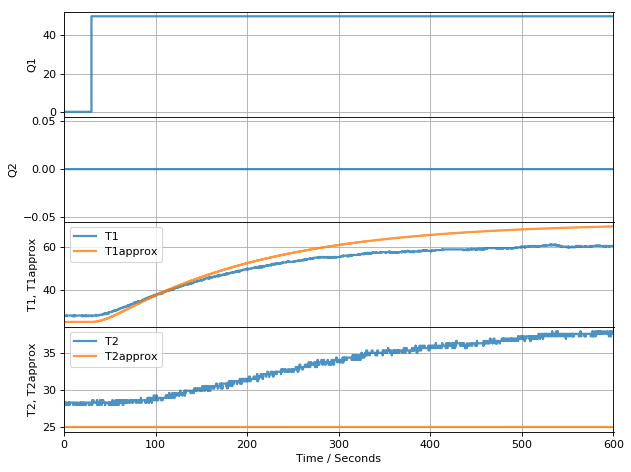

TCLab disconnected successfully.


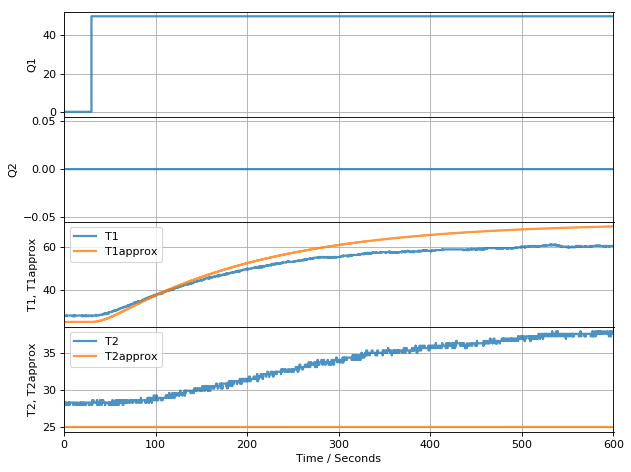

In [33]:
with TCLab() as lab:
    
    hist = Historian(lab.sources + [('T1approx', T1_model)] + [('T2approx', T2_model)])
    p = Plotter(hist, tfinal, layout=(('Q1',), ('Q2',), ('T1', 'T1approx'), ('T2', 'T2approx')))
    #hist = Historian(lab.sources)
    #p = Plotter(hist, tfinal)
    dt = t_step
    To = [298.15, 298.15, 298.15, 298.15, 298.15, 298.15]
    TF1, TF2, TH1, TH2, TS1, TS2 = To
    TS1s = []
    TS2s = []
    Tlab1 = []
    Tlab2 = []

    for t in tclab.clock(tfinal, t_step):
        
        lab.Q1(Q_step(t, M0, M1, ts1))
        lab.Q2(Q_step(t, M0, 0, ts1))           

        To = TF1, TF2, TH1, TH2, TS1, TS2 
        dTF1dt, dTF2dt, dTH1dt, dTH2dt, dTS1dt, dTS2dt = diff(t, To)

        TF1 += dTF1dt*dt
        TF2 += dTF2dt*dt
        TH1 += dTH1dt*dt
        TH2 += dTH2dt*dt
        TS1 += dTS1dt*dt
        TS2 += dTS2dt*dt

        To = TF1, TF2, TH1, TH2, TS1, TS2
        Tss1 = TS1-273.15
        Tss2 = TS2-273.15
        TS1s.append(TS1-273.15)
        TS2s.append(TS2-273.15)
        Tlab1.append(lab.T1)
        Tlab2.append(lab.T2)
        tspan.append(t)
        hist.update(t)
        p.update(t)
    plt.savefig('Temp_real5.svg')

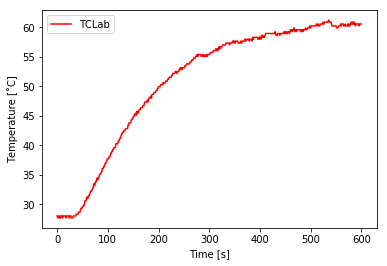

0.6509999999999999


In [36]:
# plt.plot(tspan, TS1s, "b-", label = 'Developed Model (TS1)')
plt.plot(tspan, Tlab1, "r-", label = 'TCLab')
plt.xlabel("Time [s]")
plt.ylabel("Temperature [˚C]")
plt.legend(loc='best')
plt.savefig('k2.svg')
plt.show()
print((Tlab1[-1] - Tlab1[0])/50)